In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

remove Unnamed: 0, since it doe not carry any information (best practices)

In [41]:
df = pd.read_csv("../data/fraud_data.csv", index_col=0)
df.reset_index(drop=True, inplace=True)
df.head()


,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [11]:
df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [19]:
fraud_ratio = df['is_fraud'].mean() * 100
print(f"Fraud transactions percentage: {fraud_ratio:.2f}%")

Fraud transactions percentage: 0.39%


In [20]:
fraud=df[df["is_fraud"]==1]
not_fraud=df[df["is_fraud"]==0]
print(fraud.shape[0])
print(not_fraud.shape[0])

2145
553574


## Data Cleaning

In [14]:
df.dropna(inplace=True) # drop rows with missing values

In [17]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum() # count duplicate values

0

Convert the trans_date_trans_time into datetime format:

In [42]:
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

## Exploratory Data Analysis (EDA)

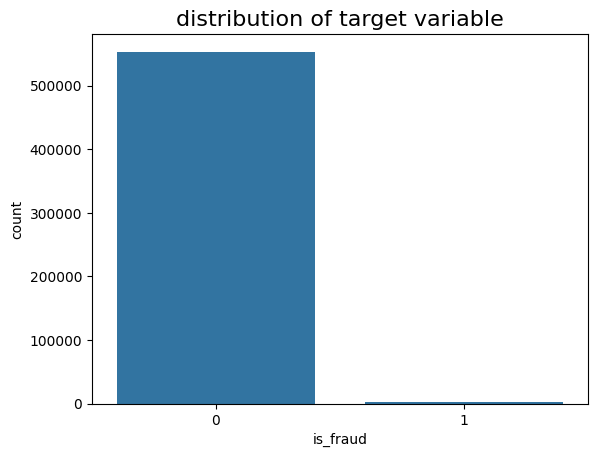

In [53]:
# distribution of target variable
sns.countplot(x='is_fraud', data=df)
plt.title('distribution of target variable', fontsize=16)
plt.show()

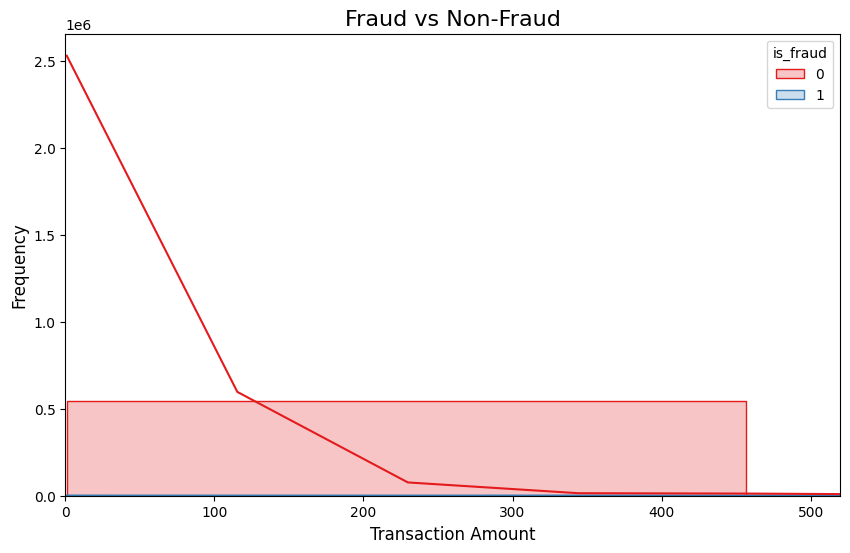

In [37]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amt', hue='is_fraud', bins=50, kde=True, palette='Set1', element='step')
plt.title('Fraud vs Non-Fraud', fontsize=16)
plt.xlabel('Transaction Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.xlim([0, df['amt'].quantile(0.99)])
plt.show()

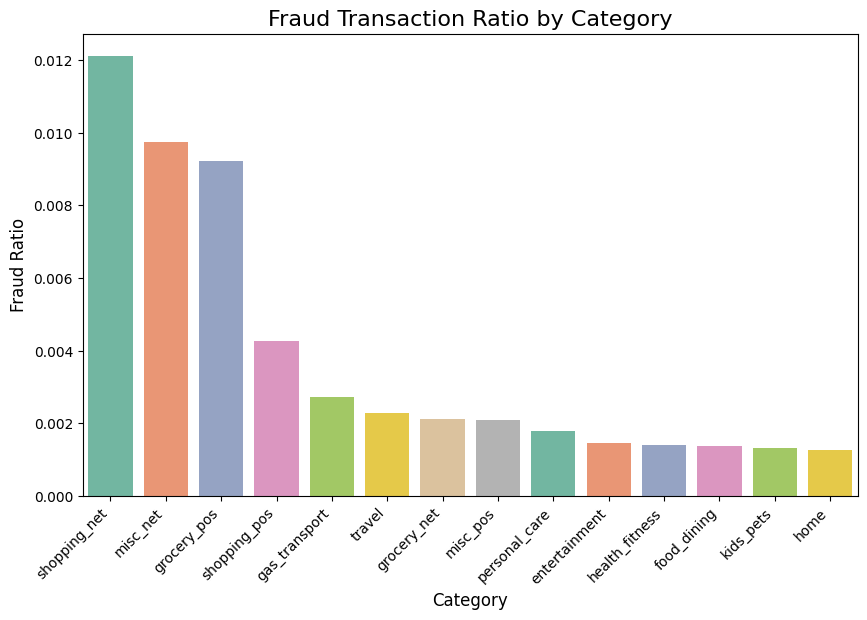

In [43]:
import warnings
warnings.filterwarnings('ignore')

category_fraud_ratio = df.groupby('category')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=category_fraud_ratio.index, y=category_fraud_ratio.values, palette='Set2')
plt.title('Fraud Transaction Ratio by Category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Fraud Ratio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

## Feature Engineering

In [49]:
df['year'] = df['trans_date_trans_time'].dt.year
df['month'] = df['trans_date_trans_time'].dt.month
df['day'] = df['trans_date_trans_time'].dt.day
df['hour'] = df['trans_date_trans_time'].dt.hour


le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['category'] = le.fit_transform(df['category'])
df['job'] = le.fit_transform(df['job'])
df['merchant'] = le.fit_transform(df['merchant'])

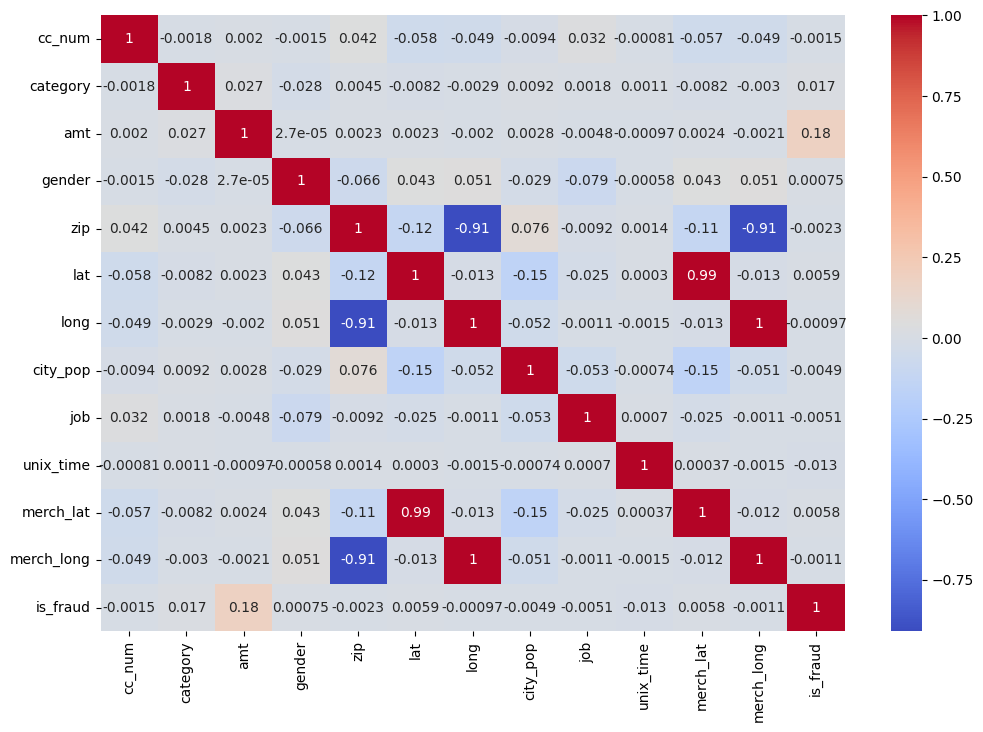

In [52]:
# Correlation matrix
# Use a heatmap to observe correlations between features
numerical_cols = ['cc_num', 'category', 'amt', 'gender', 'zip', 'lat',
       'long', 'city_pop', 'job', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud']
corr = df[numerical_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

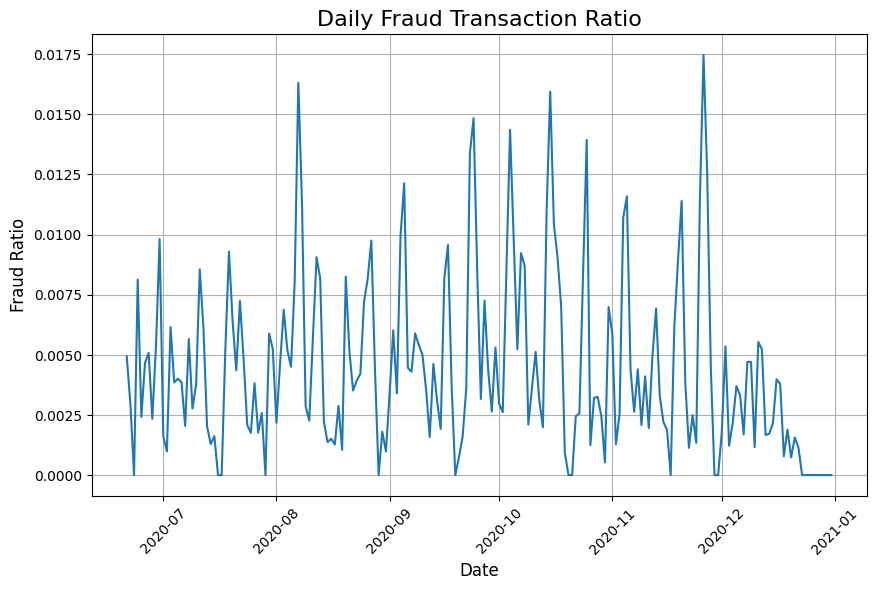

In [61]:

df['date'] = df['trans_date_trans_time'].dt.date
fraud_ratio_per_date = df.groupby('date')['is_fraud'].mean()

plt.figure(figsize=(10, 6))
sns.lineplot(x=fraud_ratio_per_date.index, y=fraud_ratio_per_date.values)
plt.title('Daily Fraud Transaction Ratio', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Fraud Ratio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

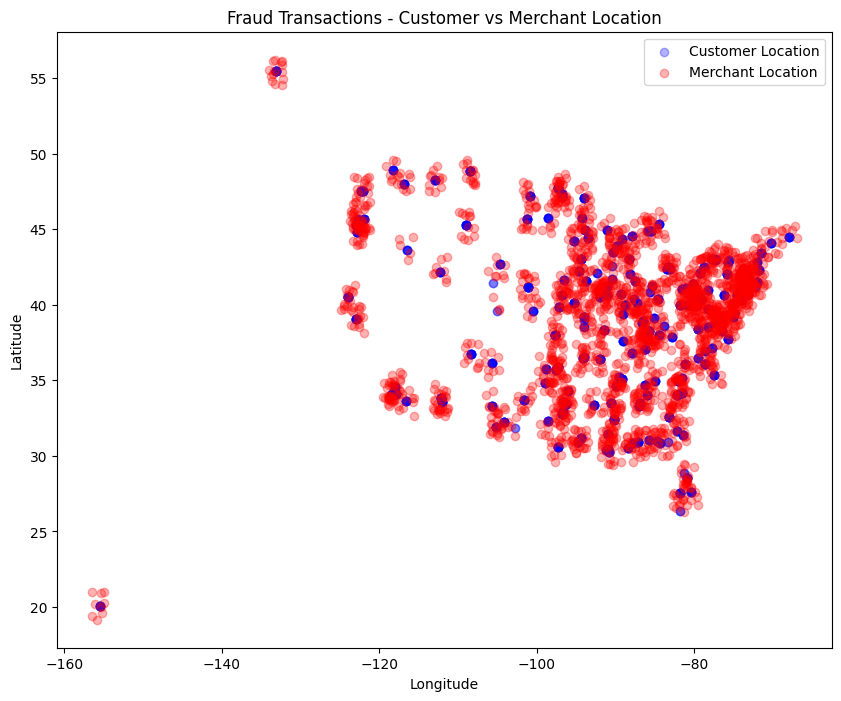

In [62]:
fraud_data = df[df['is_fraud'] == 1]

plt.figure(figsize=(10, 8))

plt.scatter(fraud_data['long'], fraud_data['lat'], alpha=0.3, color='blue', label='Customer Location')

plt.scatter(fraud_data['merch_long'], fraud_data['merch_lat'], alpha=0.3, color='red', label='Merchant Location')

plt.title('Fraud Transactions - Customer vs Merchant Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

## Split the data

In [63]:
import os

# Splitting into features and target variable
X = df.drop(columns=['is_fraud'])  # Features
y = df['is_fraud']  # Target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Combine features and target back for saving as CSV
train_data = X_train.copy()
train_data['is_fraud'] = y_train

test_data = X_test.copy()
test_data['is_fraud'] = y_test

# Create directory if it doesn't exist
save_dir = '../data'
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Save the train and test data as CSV files
train_data.to_csv(os.path.join(save_dir, 'train.csv'), index=False)
test_data.to_csv(os.path.join(save_dir, 'test.csv'), index=False)

print("Data has been split and saved successfully!")


Data has been split and saved successfully!
